In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime

In [3]:
#the glider surfacing positions were originally stored as .dat files that approximated a space separated values lists
#converting them to csvs made it a little more uniform to read the values with pd and manipulate them
ram1 = pd.read_csv('ram1.csv', sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')
print(ram1)

FileNotFoundError: [Errno 2] No such file or directory: 'ram1.csv'

In [9]:
ram2 = pd.read_csv('ram2.csv', sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')
ram3 = pd.read_csv('ram3.csv', sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

In [10]:
print(ram2)
print(ram3)

     Latitude  Longitude  Month  Day  Year  Hour  Minute  Second
0    3251.030  -7801.253      2   15  2012    20      10      21
1    3251.013  -7801.297      2   15  2012    20      12      10
2    3250.915  -7801.508      2   15  2012    20      21      25
3    3250.800  -7801.749      2   15  2012    20      31      23
4    3250.767  -7801.823      2   15  2012    20      35       8
..        ...        ...    ...  ...   ...   ...     ...     ...
235  3320.459  -7734.591      3   14  2012    16      51       0
236  3320.650  -7733.796      3   14  2012    17      24      29
237  3320.770  -7733.006      3   14  2012    17      55      32
238  3320.802  -7732.165      3   14  2012    18      26      48
239  3320.776  -7731.269      3   14  2012    18      57      55

[240 rows x 8 columns]
     Latitude  Longitude  Month  Day  Year  Hour  Minute  Second
0    3256.244  -7805.606      3   16  2012    15      32      15
1    3256.269  -7805.572      3   16  2012    15      35      37
2

In [11]:
print(ram1.columns)

Index(['Latitude', 'Longitude', 'Month', 'Day', 'Year', 'Hour', 'Minute',
       'Second'],
      dtype='object')


In [12]:
#I thought converting these 6 columns to a single datetime would make it easy to compare and order the data
#but it was already organized in time order, so it wasn't necessary this time
ram1['Time'] = pd.to_datetime(ram1[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']])
print(ram1)

     Latitude  Longitude  Month  Day  Year  Hour  Minute  Second  \
0    3256.033  -7806.311      1   25  2012    16      55       6   
1    3255.791  -7806.463      1   25  2012    17      22      52   
2    3255.762  -7806.473      1   25  2012    17      27      42   
3    3255.751  -7806.473      1   25  2012    17      30      24   
4    3255.680  -7806.465      1   25  2012    17      42       3   
..        ...        ...    ...  ...   ...   ...     ...     ...   
248  3228.964  -7845.053      2   14  2012    11      43      44   
249  3228.957  -7845.031      2   14  2012    11      57       5   
250  3228.606  -7844.822      2   14  2012    12      36       5   
251  3228.553  -7844.787      2   14  2012    12      54      15   
252  3228.288  -7844.741      2   14  2012    13      28      46   

                   Time  
0   2012-01-25 16:55:06  
1   2012-01-25 17:22:52  
2   2012-01-25 17:27:42  
3   2012-01-25 17:30:24  
4   2012-01-25 17:42:03  
..                  ...  
2

In [13]:
ram1.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'], axis=1) 

,Latitude,Longitude,Time
0,3256.033,-7806.311,2012-01-25 16:55:06
1,3255.791,-7806.463,2012-01-25 17:22:52
2,3255.762,-7806.473,2012-01-25 17:27:42
3,3255.751,-7806.473,2012-01-25 17:30:24
4,3255.680,-7806.465,2012-01-25 17:42:03
...,...,...,...
248,3228.964,-7845.053,2012-02-14 11:43:44
249,3228.957,-7845.031,2012-02-14 11:57:05
250,3228.606,-7844.822,2012-02-14 12:36:05
251,3228.553,-7844.787,2012-02-14 12:54:15


In [14]:
ram2['Time'] = pd.to_datetime(ram2[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']])
ram3['Time'] = pd.to_datetime(ram3[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']])
ram2.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'], axis=1)
ram3.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'], axis=1)

,Latitude,Longitude,Time
0,3256.244,-7805.606,2012-03-16 15:32:15
1,3256.269,-7805.572,2012-03-16 15:35:37
2,3256.266,-7805.571,2012-03-16 15:36:24
3,3256.259,-7805.558,2012-03-16 15:39:40
4,3256.247,-7805.551,2012-03-16 15:49:32
...,...,...,...
123,3249.927,-7805.669,2012-04-03 19:28:21
124,3249.922,-7805.912,2012-04-03 19:41:05
125,3249.904,-7806.156,2012-04-03 19:54:06
126,3249.904,-7806.197,2012-04-03 19:56:32


In [15]:
import matplotlib.pyplot as plt

In [16]:
max_long = ram1['Longitude'].max()
print(max_long)

-7759.635


In [17]:
boundaries = (ram1['Latitude'].min(), ram1['Latitude'].max(), ram1['Longitude'].min(), ram1['Longitude'].max())
print(boundaries)
#did this at first so that we could plot the data on a shapefile of the nearby coastline
#the paths are far enough offshore I decided it wasn't worth the effort at this time

(3220.515, 3256.033, -7845.053000000001, -7759.635)


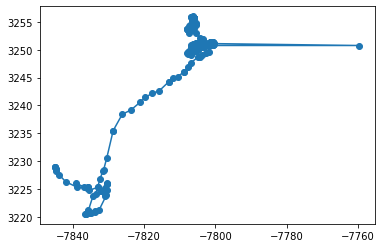

In [18]:
plt.plot(ram1['Longitude'], ram1['Latitude'], '-o')
plt.show()

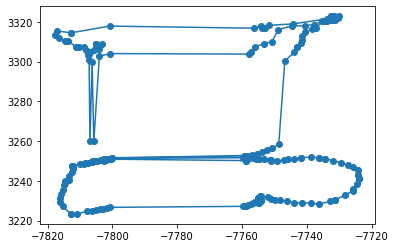

In [19]:
#Other than a couple of little outlier points, the route that the glider took is pretty clear here
#I'm going to plot the other two legs of the trip and see if they look similar
plt.plot(ram2['Longitude'], ram2['Latitude'], '-o')
plt.show()

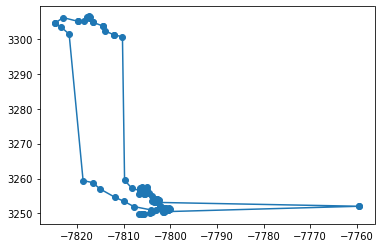

In [20]:
plt.plot(ram3['Longitude'], ram3['Latitude'], '-o')
plt.show()

In [21]:
#We don't know how this glider was planned to move around in this project yet, 
#but these initial paths don't seem horribly efficient
#all of them end up doing a bit of zig-zagging back and forth a bit. it may have a purpose, but I'm not sure what


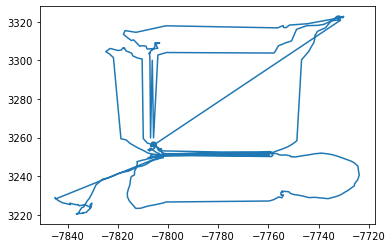

In [22]:
#just for fun, I'm going to combine and plot all of them at once
ram = ram1.append(ram2.append(ram3))
plt.plot(ram['Longitude'], ram['Latitude'], '')
plt.show()

In [35]:
#the Ramses glider didn't have the same issue as the Pelagia glider did where there was a week of no data
#but it still has some spots where it moved pretty large distances between surfacing,
#as shown by the long straight lines on the path
#the second leg of the trip is a very odd shape. It looks almost like the glider was trying to cirumvent some obstacles